In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [2]:
data = pd.read_excel("C:/Users/adwai/Downloads/bank-additional-full.xlsx")

In [4]:
data.shape

(41188, 21)

In [40]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Checking the categories and their counts in each feature

print("Job:",data.job.value_counts(),sep = '\n')
print("-"*60)
print("Marital:",data.marital.value_counts(),sep = '\n')
print("-"*60)
print("Education:",data.education.value_counts(),sep = '\n')
print("-"*60)
print("Default:",data.default.value_counts(),sep = '\n')
print("-"*60)
print("Housing loan:",data.housing.value_counts(),sep = '\n')
print("-"*60)
print("Personal loan:",data.loan.value_counts(),sep = '\n')
print("-"*60)
print("Contact:",data.contact.value_counts(),sep = '\n')
print("-"*60)
print("Month:",data.month.value_counts(),sep = '\n')
print("-"*60)
print("Day:",data.day_of_week.value_counts(),sep = '\n')
print("-"*60)
print("Previous outcome:",data.poutcome.value_counts(),sep = '\n')
print("-"*60)
print("Outcome of this campaign:",data.y.value_counts(),sep = '\n')
print("-"*60)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------------------------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------------------------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------------------------------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
------------------------------------------

In [3]:
for column in data.columns:
    data[column].replace('unknown', np.nan, inplace=True)
    data.dropna(inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [5]:
data.reset_index(inplace=True,drop=True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
data.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

Since default feature is mostly "no" which is highly imbalanced ,we dropped this feature

In [3]:
data.drop("default",inplace=True,axis = 1)

In [8]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Exploratary Data Analysis and Preprocessing

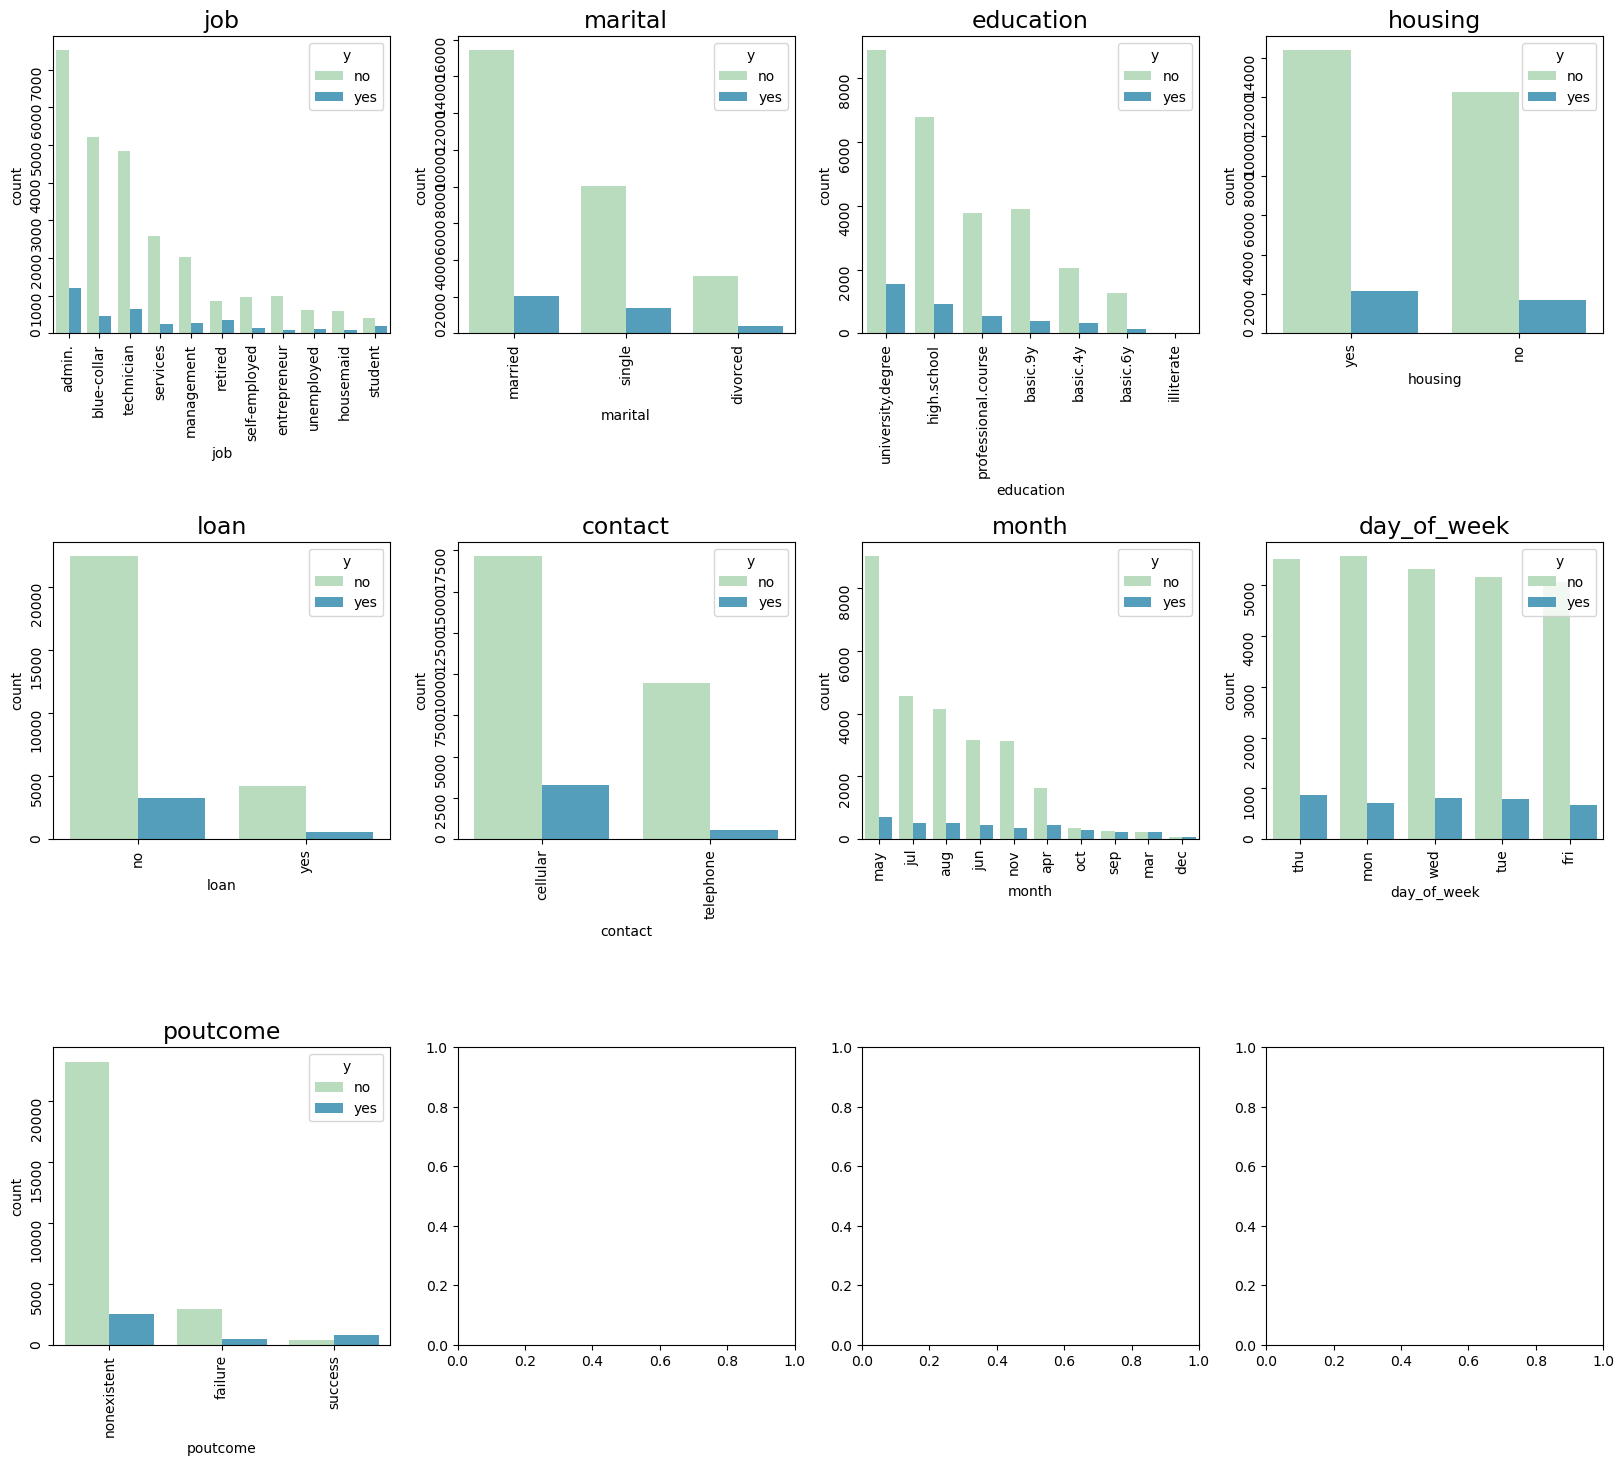

In [10]:
fig, ax = plt.subplots(3,4, figsize=(20,17))
cat = data.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = data[i].value_counts().index
    sns.countplot(data=data, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

Clearly, the data is imbalanced.

For the education feature, there are some similar values like basic.9y, basic.6y and basic.4y. We convert them to "middle.shool"

In [4]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    data.loc[data['education'] == i, 'education'] = "middle.school"

data['education'].value_counts()

middle.school          12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In poutcome feature, there is also a problem with missing value, but since it is too much data, we convert them to 0.

In [5]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [6]:
# binary if were was an outcome of marketing campane
data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 


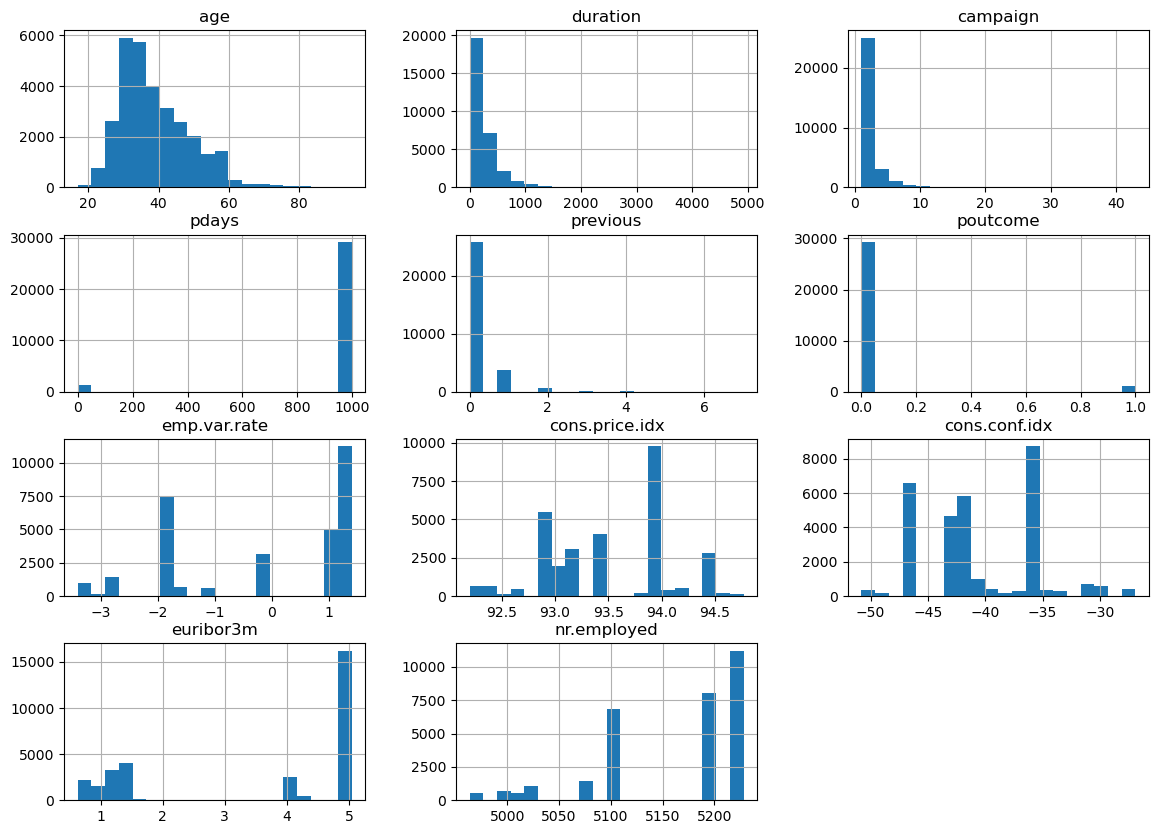

In [14]:
data.hist(bins=20, figsize=(14,10))
plt.show()

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
duration,30488.0,259.484092,261.714262,0.000,103.000,181.000,321.000,4918.000
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
poutcome,30488.0,0.039065,0.193752,0.000,0.000,0.000,0.000,1.000
emp.var.rate,30488.0,-0.071510,1.610399,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045


Age range, from 17 to 95 years old. However, a majority of age of 30s and 40s (31 to 45 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.
'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' don't show any apparent distribution

In [7]:
data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [8]:
data.loc[data['pdays'] == 999, 'pdays'] = 0

<AxesSubplot:>

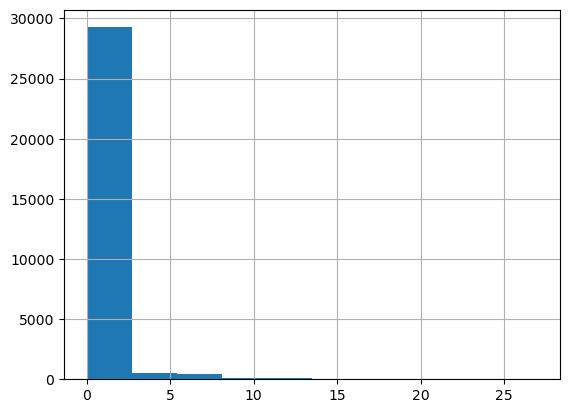

In [19]:
data["pdays"].hist()

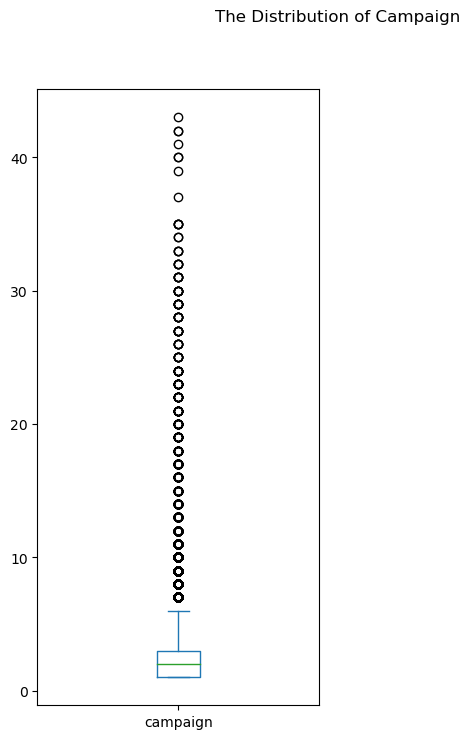

In [15]:
data[['campaign']].plot(kind = 'box', figsize = (8,8),subplots = True, layout = (1,2),sharex = False, sharey = False,title='The Distribution of Campaign')
plt.show()

<AxesSubplot:xlabel='campaign', ylabel='count'>

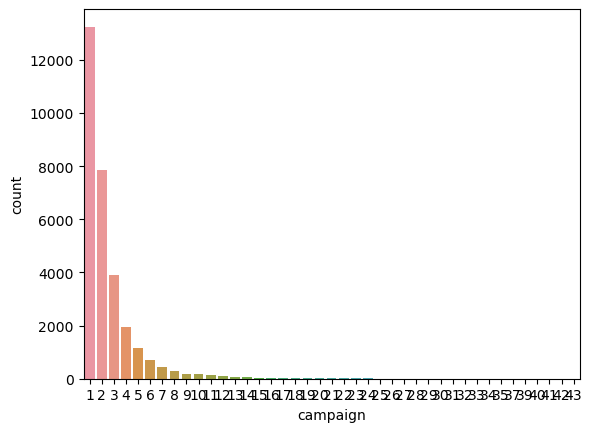

In [20]:
sns.countplot(x="campaign",data=data)

In [9]:
data["campaign"].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

<AxesSubplot:>

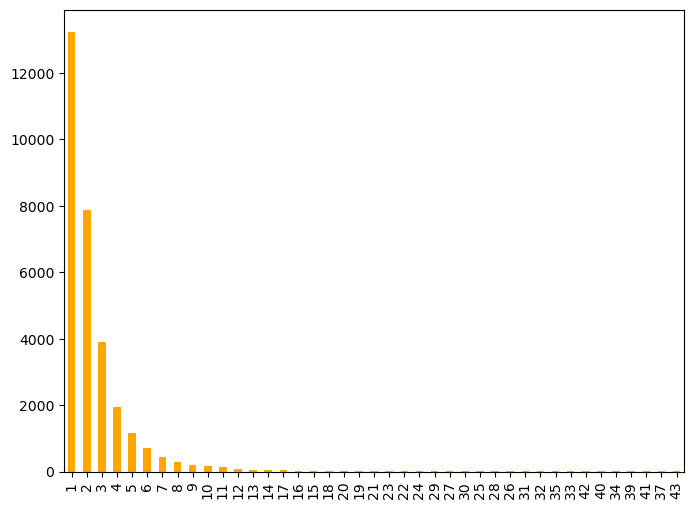

In [19]:
plt.figure(figsize=(8,6))
data['campaign'].value_counts().plot(kind='bar',color='orange')

Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 43 times, which is not normal.

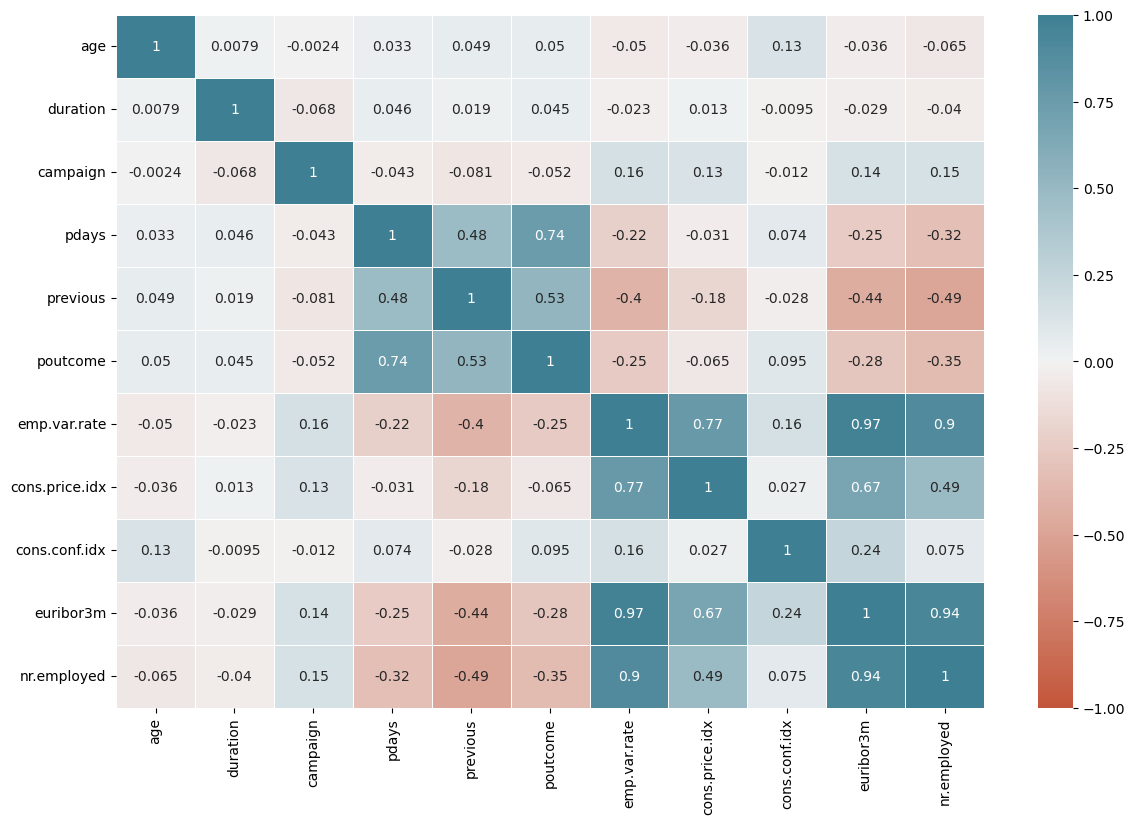

In [23]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

In [10]:
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week","y"]
for i in objects:  
    data[i] = le.fit_transform(data[i])

In [11]:
x = data.iloc[:,data.columns != 'y']
y = data.y


In [34]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,unknown,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,no,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,no,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,no,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<AxesSubplot:>

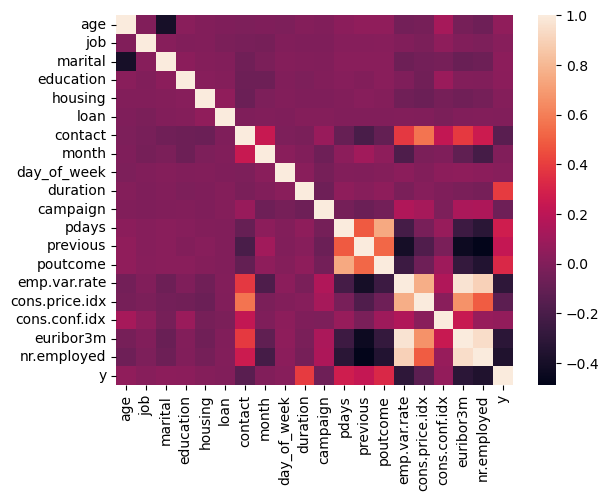

In [28]:
sns.heatmap(data.corr())

In [18]:
print("x columns:", list(x.columns))

x columns: ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify = y, random_state=0)

In [20]:
#convert data into standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

C:\Users\adwai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
accuracy = accuracy_score(y_test, y_pred_knn)*100
accuracy

87.9796654640866

In [37]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
confusion_matrix = confusion_matrix(y_test,y_pred_knn)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred_knn))

Confusion Matrix:
 [[5098  228]
 [ 505  267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      5326
           1       0.54      0.35      0.42       772

    accuracy                           0.88      6098
   macro avg       0.72      0.65      0.68      6098
weighted avg       0.86      0.88      0.87      6098



In [39]:
from sklearn.metrics import confusion_matrix

SVM

In [14]:
#Create an SVM classifier
svm_classifier = SVC(kernel = 'linear',C = 1.0)
#Train the classifier
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [15]:
#Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test)
#Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test,y_pred_svm)*100
print(f"Accuracy: {accuracy}")

Accuracy: 89.80335032774946


In [43]:
print("Classification Report:\n",classification_report(y_test,y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5326
           1       0.65      0.30      0.41       772

    accuracy                           0.89      6098
   macro avg       0.78      0.64      0.67      6098
weighted avg       0.87      0.89      0.87      6098



LOGISTIC REGRESSION

In [24]:
#Create  a logistic regression classifier
logreg_classifier = LogisticRegression()
#Train the classifier
logreg_classifier.fit(x_train,y_train)

LogisticRegression()

In [25]:
#Make preictions on the test set
y_pred_log = logreg_classifier.predict(x_test)
#Evaluate the accuracy of the classifier


In [38]:
#Additional evaluation metrics
print("\nClassification Report :")
print(classification_report(y_test,y_pred_log))



Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5326
           1       0.65      0.39      0.49       772

    accuracy                           0.90      6098
   macro avg       0.79      0.68      0.72      6098
weighted avg       0.88      0.90      0.89      6098



In [39]:
confusion_matrix = confusion_matrix(y_test,y_pred_log)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred_log))

Confusion Matrix:
 [[5166  160]
 [ 469  303]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5326
           1       0.65      0.39      0.49       772

    accuracy                           0.90      6098
   macro avg       0.79      0.68      0.72      6098
weighted avg       0.88      0.90      0.89      6098



In [26]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtreey_pred = dtree.predict(x_test)
accdtree = accuracy_score(y_test, dtreey_pred)*100
print(f'Accuracy : {accdtree}')

Accuracy : 87.55329616267629


In [35]:
print("Classification Report:\n",classification_report(y_test,dtreey_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5326
           1       0.52      0.51      0.51       772

    accuracy                           0.88      6098
   macro avg       0.72      0.72      0.72      6098
weighted avg       0.88      0.88      0.88      6098



In [36]:
confusion_matrix = confusion_matrix(y_test,dtreey_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,dtreey_pred))

Confusion Matrix:
 [[4962  364]
 [ 380  392]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5326
           1       0.52      0.51      0.51       772

    accuracy                           0.88      6098
   macro avg       0.72      0.72      0.72      6098
weighted avg       0.88      0.88      0.88      6098



In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rfy_pred = rf.predict(x_test)
accrf = accuracy_score(y_test, rfy_pred)*100
print(f'Accuracy : {accrf}')

Accuracy : 90.34109544112823


In [23]:
print("Classification Report:\n",classification_report(y_test,rfy_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      5326
           1       0.65      0.51      0.57       772

    accuracy                           0.90      6098
   macro avg       0.79      0.74      0.76      6098
weighted avg       0.90      0.90      0.90      6098



In [24]:
confusion_matrix = confusion_matrix(y_test,rfy_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,rfy_pred))

Confusion Matrix:
 [[5112  214]
 [ 375  397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      5326
           1       0.65      0.51      0.57       772

    accuracy                           0.90      6098
   macro avg       0.79      0.74      0.76      6098
weighted avg       0.90      0.90      0.90      6098



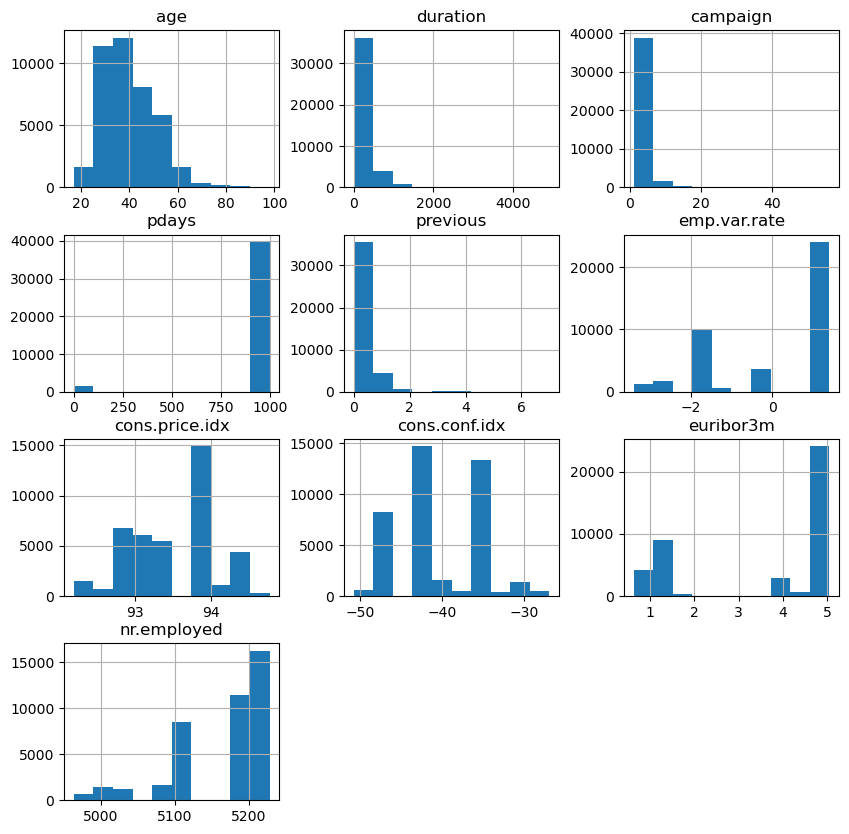

In [8]:
# Histograms for numeric variables
data.hist(figsize=(10, 10))
plt.show()

In [18]:
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","loan","y"]
for i in objects:  
    data[i] = le.fit_transform(data[i])

In [30]:
# AUC/ROC Curve

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, rfy_pred)
auc_score = roc_auc_score(y_test, rfy_pred)

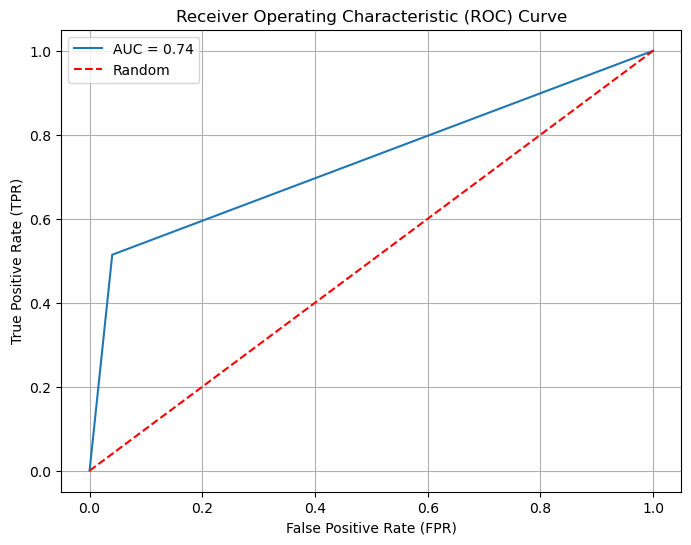

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()


Text(0.5, 1.0, 'Confusion\xa0Matrix')

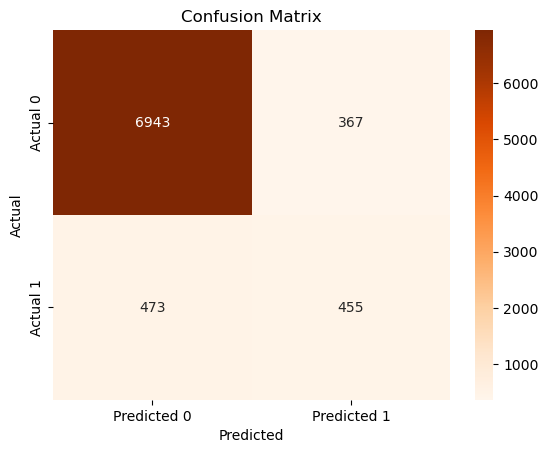

In [17]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')